# **CUSTOMER SEGMENTATION BY RFM MODEL**

## I. Import packages and data

In [11]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Ecommerce/RFM Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Ecommerce/RFM Analysis


In [12]:
#data cleaning
import numpy as np
import pandas as pd
import datetime
import math

#data visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly as py
import plotly.graph_objs as go

#palette
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [13]:
rfm_df = pd.read_csv("Data/rfm_df.csv")
rfm_df.head()

,customer_unique_id,recency,recency_log,monentary,monentary_log,frequency,frequency_log,clusters_3,clusters_5,clusters_7
0,0000366f3b9a7992bf8c76cfdf3221e2,161,-0.674370,141.90,0.285204,1,-0.003226,0,3,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,-0.644544,27.19,-1.730638,1,-0.003226,1,0,1
2,0000f46a3911fa3c0805444483337064,587,1.415463,86.22,-0.322646,1,-0.003226,1,2,2
3,0000f6ccb0745a6a4b88665a16c9f078,371,0.674239,43.62,-1.153966,1,-0.003226,1,2,6
4,0004aac84e0df4da2b147fca70cf8255,338,0.523746,196.89,0.684795,1,-0.003226,2,1,2


 ## II. Clusters Analysis

#### 1) 3 clusters

In [14]:
#3 clusters
c3_0 = rfm_df[rfm_df['clusters_3'] == 0]
c3_1 = rfm_df[rfm_df['clusters_3'] == 1]
c3_2 = rfm_df[rfm_df['clusters_3'] == 2]

#5 clusters
c5_0 = rfm_df[rfm_df['clusters_5'] == 0]
c5_1 = rfm_df[rfm_df['clusters_5'] == 1]
c5_2 = rfm_df[rfm_df['clusters_5'] == 2]
c5_3 = rfm_df[rfm_df['clusters_5'] == 3]
c5_4 = rfm_df[rfm_df['clusters_5'] == 4]

#7 clusters
c7_0 = rfm_df[rfm_df['clusters_7'] == 0]
c7_1 = rfm_df[rfm_df['clusters_7'] == 1]
c7_2 = rfm_df[rfm_df['clusters_7'] == 2]
c7_3 = rfm_df[rfm_df['clusters_7'] == 3]
c7_4 = rfm_df[rfm_df['clusters_7'] == 4]
c7_5 = rfm_df[rfm_df['clusters_7'] == 5]
c7_6 = rfm_df[rfm_df['clusters_7'] == 6]

In [15]:
rfm_df.groupby('clusters_3').agg({'monentary':'mean','recency':'mean','frequency':'mean'})

,monentary,recency,frequency
clusters_3,,,
0,127.756266,116.128953,1.067404
1,69.997558,366.034817,1.053990
2,327.900913,336.087912,1.128703


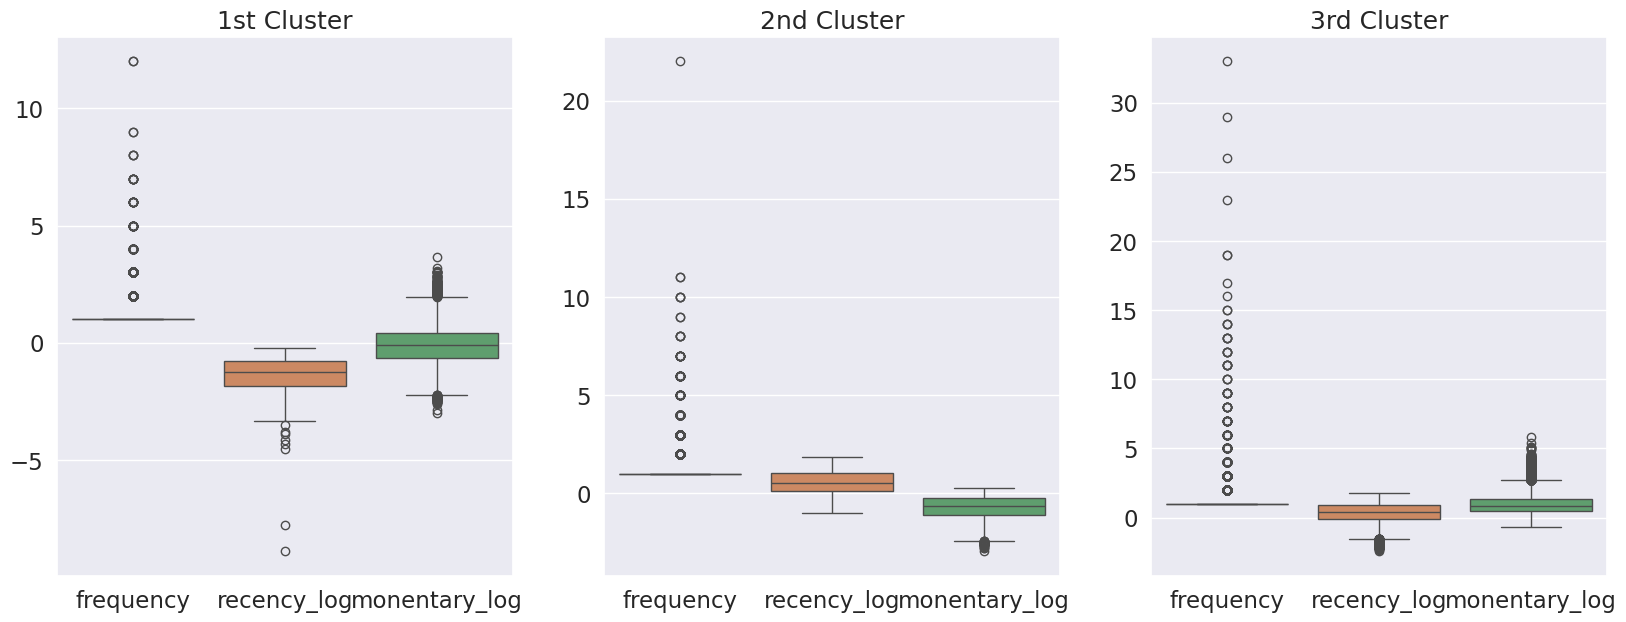

In [16]:
#3 clusters
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131); sns.boxplot(data=c3_0[['frequency','recency_log','monentary_log']])
ax2 = fig.add_subplot(132); sns.boxplot(data=c3_1[['frequency','recency_log','monentary_log']])
ax3 = fig.add_subplot(133); sns.boxplot(data=c3_2[['frequency','recency_log','monentary_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")

#display
plt.show()

### 2) 5 cluster analysis

In [ ]:
rfm_df.groupby('clusters_5').agg({'monentary':'mean','recency':'mean','frequency':'mean'})

,monentary,recency,frequency
clusters_5,,,
0,62.674759,129.104241,1.041709
1,150.224621,369.630510,1.080015
2,54.506819,378.435379,1.049290
3,214.307619,122.991157,1.098244
4,596.700224,333.934065,1.202215


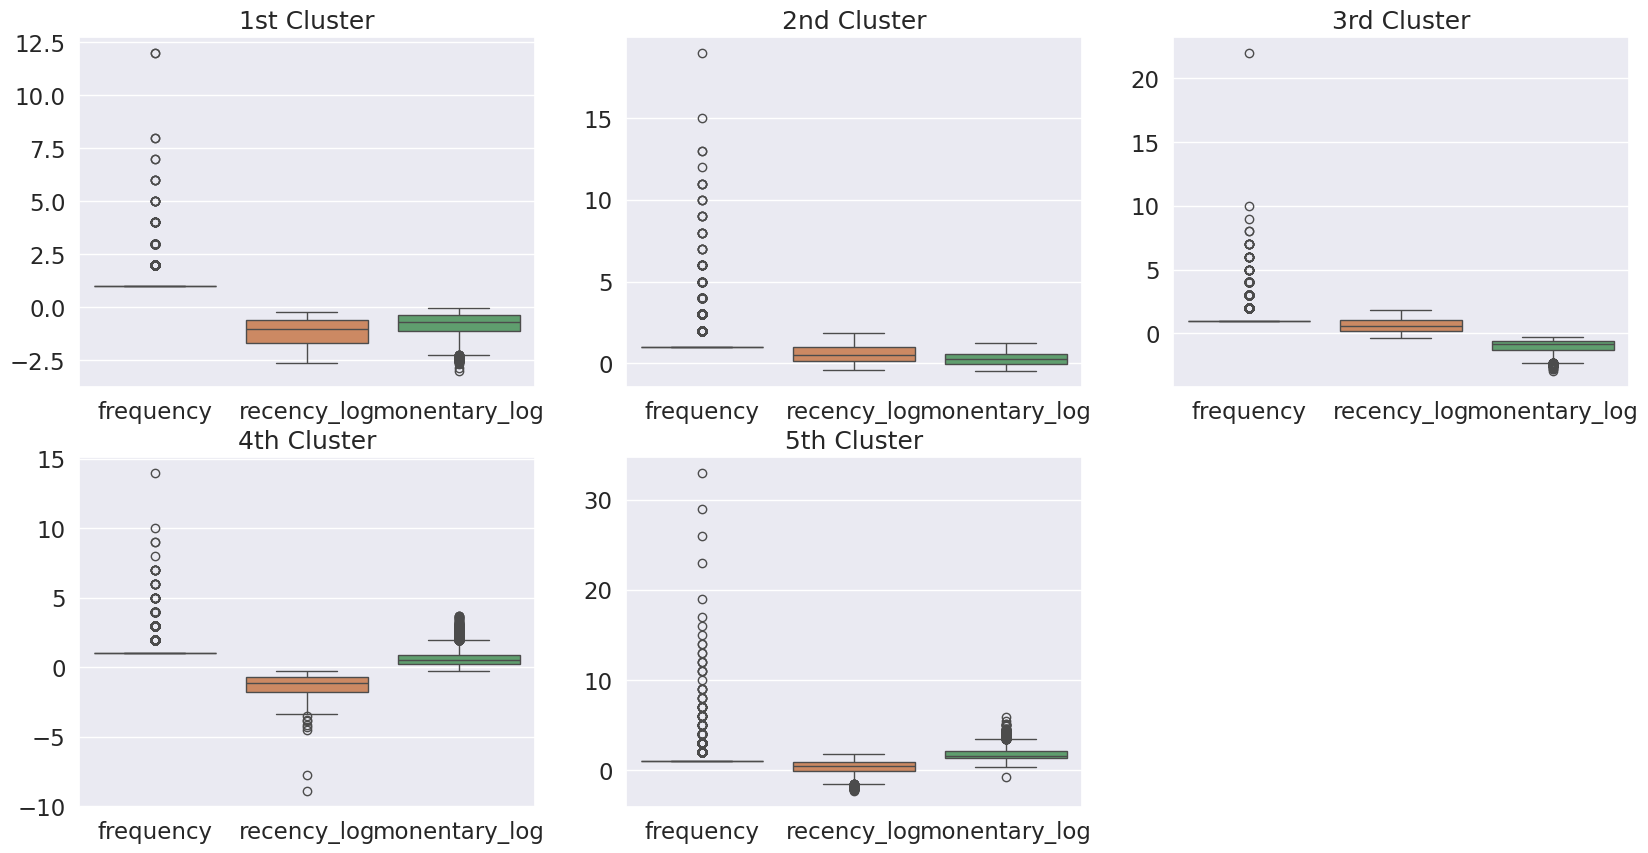

In [ ]:
#3 clusters
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(231); sns.boxplot(data=c5_0[['frequency','recency_log','monentary_log']])
ax2 = fig.add_subplot(232); sns.boxplot(data=c5_1[['frequency','recency_log','monentary_log']])
ax3 = fig.add_subplot(233); sns.boxplot(data=c5_2[['frequency','recency_log','monentary_log']])
ax4 = fig.add_subplot(234); sns.boxplot(data=c5_3[['frequency','recency_log','monentary_log']])
ax5 = fig.add_subplot(235); sns.boxplot(data=c5_4[['frequency','recency_log','monentary_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")
ax4.title.set_text("4th Cluster")
ax5.title.set_text("5th Cluster")

#display
plt.show()

### 3) 7 cluster Analysis

In [17]:
rfm_df.groupby('clusters_7').agg({'monentary':'mean','recency':'mean','frequency':'mean'})

,monentary,recency,frequency
clusters_7,,,
0,222.123725,318.544413,6.177650
1,56.472862,115.950276,1.033735
2,150.510091,444.603337,1.064795
3,592.312783,320.956713,1.133844
4,233.538668,93.510889,1.094475
5,138.468845,215.231908,1.056264
6,51.696758,370.803279,1.036501


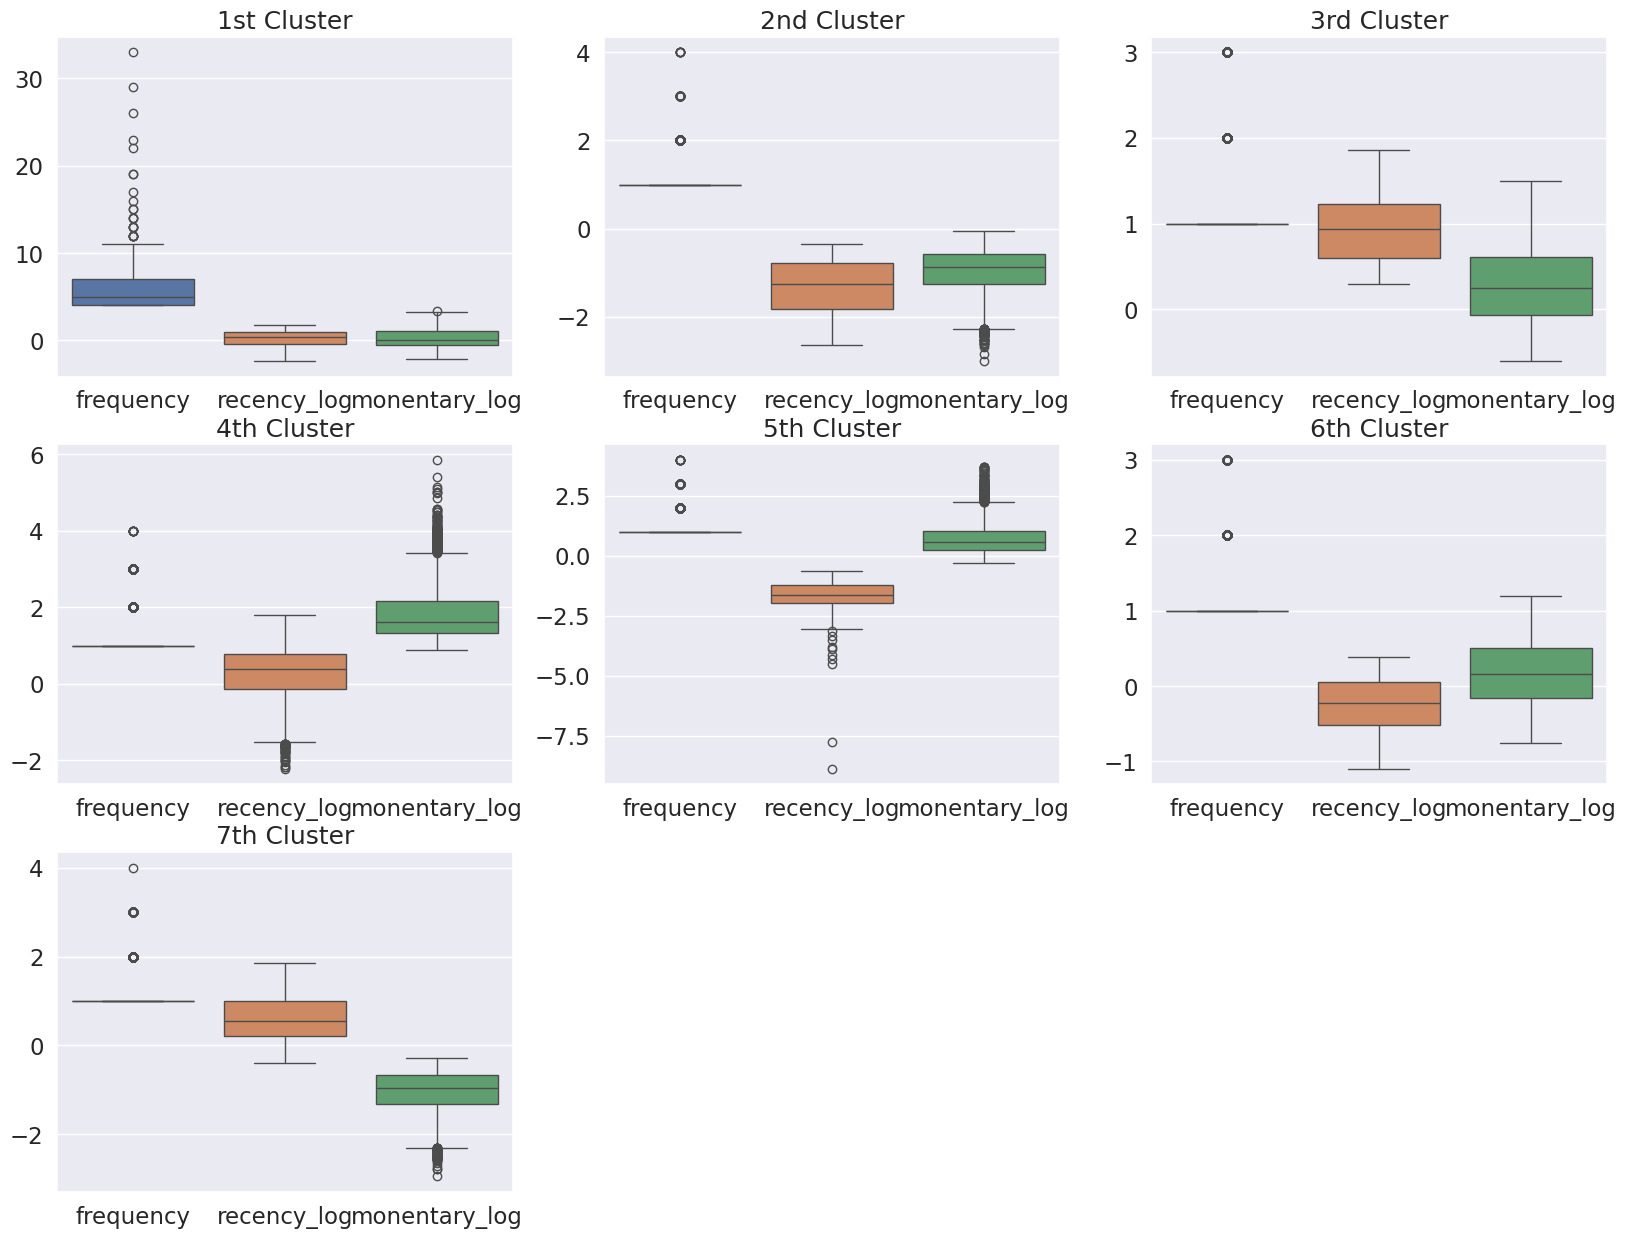

In [45]:
#7 clusters
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(331); sns.boxplot(data=c7_0[['frequency','recency_log','monentary_log']])
ax2 = fig.add_subplot(332); sns.boxplot(data=c7_1[['frequency','recency_log','monentary_log']])
ax3 = fig.add_subplot(333); sns.boxplot(data=c7_2[['frequency','recency_log','monentary_log']])
ax4 = fig.add_subplot(334); sns.boxplot(data=c7_3[['frequency','recency_log','monentary_log']])
ax5 = fig.add_subplot(335); sns.boxplot(data=c7_4[['frequency','recency_log','monentary_log']])
ax6 = fig.add_subplot(336); sns.boxplot(data=c7_5[['frequency','recency_log','monentary_log']])
ax7 = fig.add_subplot(337); sns.boxplot(data=c7_6[['frequency','recency_log','monentary_log']])
#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")
ax4.title.set_text("4th Cluster")
ax5.title.set_text("5th Cluster")
ax6.title.set_text("6th Cluster")
ax7.title.set_text("7th Cluster")

#display
plt.show()

1. Loyal Customers
2.
3. Shark
4. Whales
5.
6.
7.